# Содержание
1. [Постановка задачи](#first)  
   1.1 [Описание данных](#first_one)  
   1.2 [Чтение данных из файла](#first_two)
2. [Предобработка данных](#second)
3. [Анализ полученных данных](#third)  
   4.1 [Определение топ-5 популярных игровых платформ в каждом регионе](#fourth_one)  
   4.2 [Определение топ-5 популярных игровых жанров в каждом регионе](#fourth_two)  
   4.3 [Определение показателей разброса данных в параметре "выручка"](#fourth_three)
4. [Проверка гипотез](#fifth)
5. [Общие выводы](#sixth)

# Анализ игр, представленных в интернет-магазине<a name="description"></a>

## Постановка задачи <a name="first"></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

### Описание данных <a name="first_one"></a>

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Чтение данных из файла <a name="first_two"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#Изучим общую информацию о датасете:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/antig/Downloads/Яндекс Практикум/games.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Предобработка данных <a name="second"></a>

In [3]:
#Приведем названия всех столбцов к нижнему регистру:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
#Определим какие типы данных присутствуют в датасете:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

В столбце 'user_score' тип данных 'object' необходимо заменить на числовой тип 'float'

In [5]:
#Определим количество пропусков в столбцах:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропусков в столбце 'name' всего два, существенно эти две строки не повлияют на общий датасет, поэтому их можно удалить, чтобы они не мешали в дальнейшем анализе.

In [6]:
#Удалим пропуски в столбце 'name':
df = df.dropna(subset=['name']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Заполнить все пропуски в столбце 'year_of_release' невозможно ни медианным значением, ни средним, ни нулями,так как год выпуска имеет конкретное значение, которое в данном случае можно найти, если искать по каждой из 269 игр.  
Поэтому пропуски в столбце 'year_of_release' мы не будем удалять или заполнять их нулями, просто будем знать,что у нас есть такое количество пропусков в этом столбце и их не нужно учитывать при дальнейшем анализе.

Пропуски в столбце 'critic_score' составляют больше половины от всего количества строк в нашем датасете. Заполним их медианными значениями в зависимости от жанра игры

In [7]:
#Сгруппируем по количеству оценок столбец 'critic_score':
df_1 = df.groupby('year_of_release')['critic_score'].count()
df_1_new = pd.DataFrame(df_1)
df_1_new.reset_index()

,year_of_release,critic_score
0,1980.0,0
1,1981.0,0
2,1982.0,0
3,1983.0,0
4,1984.0,0
5,1985.0,1
6,1986.0,0
7,1987.0,0
8,1988.0,1
9,1989.0,0


In [8]:
df_2 = df.groupby('year_of_release')['user_score'].count()
df_2_new = pd.DataFrame(df_1)
df_1_new.reset_index()

,year_of_release,critic_score
0,1980.0,0
1,1981.0,0
2,1982.0,0
3,1983.0,0
4,1984.0,0
5,1985.0,1
6,1986.0,0
7,1987.0,0
8,1988.0,1
9,1989.0,0


In [9]:
df_3 = df.groupby('year_of_release')['rating'].count()
df_3_new = pd.DataFrame(df_3)
df_3_new.reset_index()

,year_of_release,rating
0,1980.0,0
1,1981.0,0
2,1982.0,0
3,1983.0,0
4,1984.0,0
5,1985.0,1
6,1986.0,0
7,1987.0,0
8,1988.0,1
9,1989.0,0


Вывод: до 1996 года оценки критиков, пользователей и рейтинг ESRB не присваивались играм, соответственно, можно заполнить пропуски 0 до этого периода.
Также пропуски можно заполнить оценками критиков на другой платформе, так как вполне возможно, что оценки критиков и пользователей не зависят от платформы.

In [10]:
#Посчитаем медианные значения оценок критиков по каждому жанру:
df_critic = df.query('year_of_release > 1996')
df_critic_score = df_critic.pivot_table(index='genre', values='critic_score', 
                                        aggfunc='median').reset_index()
df_critic_score

,genre,critic_score
0,Action,68.0
1,Adventure,66.0
2,Fighting,72.0
3,Misc,69.0
4,Platform,69.5
5,Puzzle,70.0
6,Racing,69.0
7,Role-Playing,74.0
8,Shooter,73.0
9,Simulation,70.0


In [11]:
#Заполним пропуски в столбце 'critic_score':
df.loc[(df.year_of_release < 1996) & (pd.isna(df.critic_score)), 'critic_score'] = 0
df.loc[(df.year_of_release >= 1996) & (pd.isna(df.critic_score)), 'critic_score'] = df_critic_score.critic_score

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.5,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,NaN,NaN


In [12]:
#Посмотрим какие уникальные значения встречаются в столбце 'user_id':
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Перед тем как обработать пропуски в столбце 'user_score' необходимо рассмотреть значения 'tbd'.  
Аббревиатура "tbd" или To Be Determined, то есть "Будет определен" означает, что рейтинг еще не определен для вышедших игр, либо к вышедшим релизам этих игр или обновлениям.  
Предсказать,какой будет рейтинг и заполнить этим значением строки с 'tbd' мы не можем, поэтому для начала присвоим значениям с tbd значение 0, а затем заполним все значения в столбце медианными значениями.

In [13]:
#Заменим 'tbd' на 0:
df = df.replace({'user_score':{'tbd': 0}})

In [14]:
#Изменим тип данных в столбце 'user_score' c 'object' на 'float':
df['user_score'] = df['user_score'].astype(float)

In [15]:
#Посчитаем медианные значения для пользовательского рейтинга:
df_user = df.query('user_score != "NaN"')
df_user_score = df_user.pivot_table(index='genre', values='user_score', 
                               aggfunc='median').reset_index()
df_user_score

,genre,user_score
0,Action,7.0
1,Adventure,6.3
2,Fighting,7.5
3,Misc,0.0
4,Platform,7.0
5,Puzzle,0.0
6,Racing,6.6
7,Role-Playing,7.8
8,Shooter,7.3
9,Simulation,5.4


In [16]:
#Заполним пропуски в столбце 'user_score' медианным значением для соответствующего жанра:
df.loc[(df.year_of_release < 1996) & (pd.isna(df.user_score)), 'user_score'] = 0
df.loc[(df.year_of_release >= 1996) & (pd.isna(df.user_score)), 'user_score'] = df_user_score.user_score
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.5,7.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN


Остается заполнить пропуски в столбце 'rating', где указан рейтинг ESRB. Пропусков в этом столбце - 6764- это почти половина от всего количества строк в нашем датасете, поэтому удалить все эти строки мы не можем.  
Также, мы не можем заполнить все эти пропуски ни медианным значением для каждого жанра, ни средним рейтингом, ни рейтингом 'E', то есть "для всех" потому что каждой игре рейтинг ESRB был присвоен в зависимости от ее содержания и сцен в ней.  
Поэтому придется оставить пропуски в этом столбце незаполненными, равными "NaN" и учитывать это в дальнейшем анализе.

In [17]:
#Посчитаем суммарные продажи по всем регионам:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.5,7.0,NaN,31.38


In [18]:
# Проверим таблицу на наличие явных дубликатов:
df.duplicated().sum()

0

In [19]:
#Приведем значения в столбце 'year_of_release' к типу object:
df['year_of_release'] = df['year_of_release'].astype('object')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.5,7.0,NaN,31.38


## Анализ полученных данных <a name="third"></a>

In [20]:
#Определим количество игр, выпускаемых в разные годы:
df_years_of_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
df_years_of_games

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


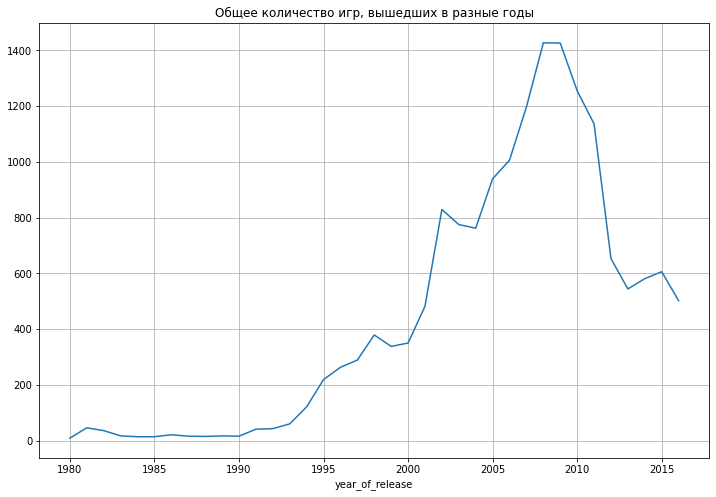

In [21]:
#График вышедших игр за все годы:
line = df_years_of_games.set_index('year_of_release')['name'].plot(
    title="Общее количество игр, вышедших в разные годы",
    kind='line',
    figsize=(12,8), grid=True)

Судя по графику, до 1995 года выходило меньше 200 игр в год, затем, начиная с этого года, количество игр стало увеличиваться примерно в 1,5 - 2 раза и в 2006м году вышло уже больше 1000 игр в год. В период с 2006 по 2008  наблюдается рост игр, а затем спад до 2011 и резкое падение почти в 2 раза в 2012. После 2012 года количество вышедших игр находилось примерно на одном уровне.  
Следовательно, для анализа нам не понадобятся данные до 2005 года, так как они слишком неактуальные и количество игр,вышедших в эти годы, сравнительно мало по сравнению с годами позже 2005.  
Поэтому можно брать периоды роста количества вышедших игр для того, чтобы понять, какие факторы способствовали этому росту,но более актуальным периодом для прогноза продаж на 2017 год, будет период с 2012 по 2016 год. 

In [22]:
#Соберем информацию о продажах игр, вышедших на разных платформах:
df_platform_sales = df.pivot_table(index=['year_of_release', 'platform'], values='all_sales', 
                                   aggfunc='sum').reset_index()
df_platform_sales

,year_of_release,platform,all_sales
0,1980.0,2600,11.38
1,1981.0,2600,35.68
2,1982.0,2600,28.88
3,1983.0,2600,5.84
4,1983.0,NES,10.96
...,...,...,...
233,2016.0,PSV,4.25
234,2016.0,Wii,0.18
235,2016.0,WiiU,4.60
236,2016.0,X360,1.52


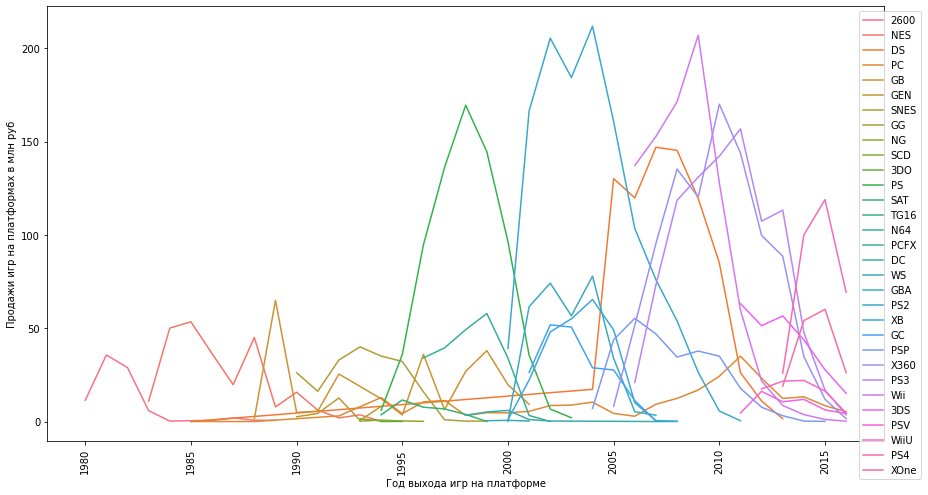

In [23]:
#Построим гистограмму для платформ по продажам за все годы, с момента их появления на рынке: 
plt.figure(figsize = (15,8))
sns.lineplot(data=df_platform_sales, x="year_of_release", 
            y="all_sales", hue="platform", ci=None)
plt.xticks(rotation=90)
plt.xlabel("Год выхода игр на платформе")
plt.ylabel("Продажи игр на платформах в млн руб")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [24]:
#Выделим 10 самых платформ с самыми высокими продажами за все годы, 
#представленные в основном датасете:
df_plat_sales = df_platform_sales.sort_values(by='all_sales', ascending=False).head(10)
df_plat_sales.reset_index()

,index,year_of_release,platform,all_sales
0,125,2004.0,PS2,211.81
1,171,2009.0,Wii,206.97
2,113,2002.0,PS2,205.38
3,119,2003.0,PS2,184.31
4,163,2008.0,Wii,171.32
5,179,2010.0,X360,170.03
6,77,1998.0,PS,169.49
7,104,2001.0,PS2,166.43
8,132,2005.0,PS2,160.66
9,184,2011.0,PS3,156.78


In [25]:
#Создадим с помощью среза датасет с наиболее актуальными годами для дальнейшего анализа:
df_new = df.query('year_of_release >= 2012')
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


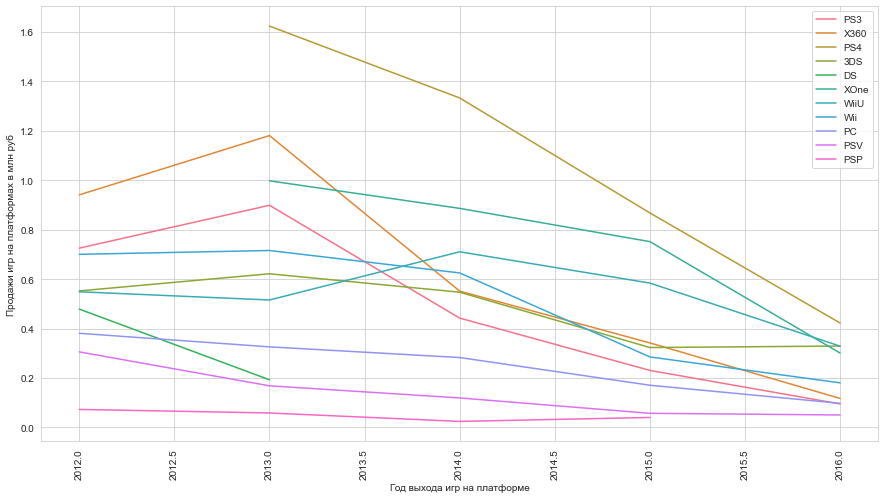

In [26]:
#Построим график распределения 10-ти наиболее продаваемых платформ по годам:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
line2 = sns.lineplot(data=df_new, x="year_of_release", 
            y="all_sales", hue="platform", ci=None)
plt.xticks(rotation=90)
plt.xlabel("Год выхода игр на платформе")
plt.ylabel("Продажи игр на платформах в млн руб")
plt.legend(loc='upper right')
plt.show()

**Вывод:** Судя по линейным графикам, можно сделать вывод о том, что на каждой платформе с момента ее выхода наблюдаются рост и спад, срок жизни каждой платформы составляет от 5 до 10 лет, новые платформы появляются примерно каждый 2-3 года.  
Наибольшие продажи за весь актуальный период (2012-2016) наблюдаются на 5-ти основных платформах:PS3, X360, PS4, 3DS, DS. На графике можно увидеть, что на каждой платформе наблюдался рост продаж до 2013 года, а затем резкий спад с 2013 по 2016. 

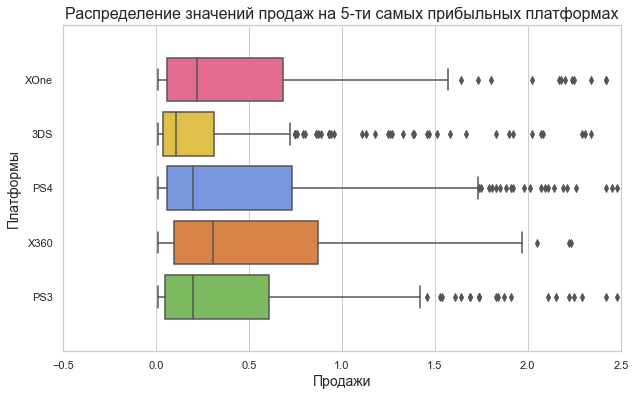

In [27]:
#Построим график продаж для 5 основных платформ:

df_plat_5 = df_new.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(5)
#df_plat_5
df_top_5 = df_new.query('platform in @df_plat_5.index')
df_top_5['platform'].value_counts()
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888']
boxplot = sns.boxplot(x=df_top_5['all_sales'], y=df_top_5['platform'], palette=colors)
plt.xlim(-0.5, 2.5)
plt.ylim(-1, 5)
boxplot.axes.set_title("Распределение значений продаж на 5-ти самых прибыльных платформах", fontsize=16)
boxplot.set_xlabel("Продажи", fontsize=14)
boxplot.set_ylabel("Платформы", fontsize=14);

Диаграмма рассеяния показывает, что все продажи на каждой платформе распределены не нормально, медианные значения смещены относительно средних влево и имеется большое количество выбросов. 

In [28]:
#Соберем в одну таблицу значения продаж по всем регионам, 
#отзывы критиков и пользователей для одной популярной платформы- "PS3"(выбираем эту, так в ней меньше выбросов):
df_ps3 = df_new.query('platform == "PS3"')
df_ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46


In [29]:
#Для построения диаграммы рассеяния и расчета коэффициентов корреляции
#создадим датасет с необходимыми столбцами:
df_ps3_corr = df_ps3[['platform', 'critic_score', 'user_score', 'all_sales']]
df_ps3_corr.head()

,platform,critic_score,user_score,all_sales
16,PS3,97.0,8.2,21.05
34,PS3,83.0,5.3,13.79
69,PS3,71.0,2.6,9.36
81,PS3,88.0,6.6,8.17
126,PS3,86.0,4.3,6.46


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


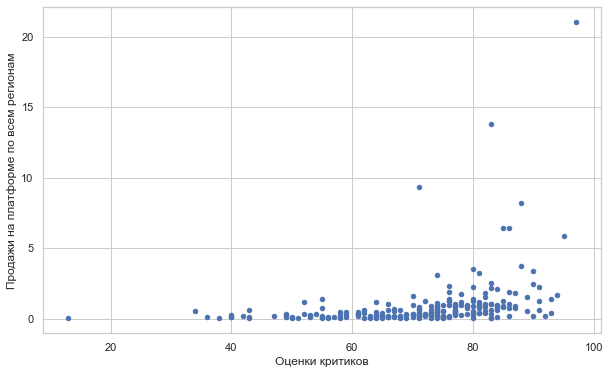

In [30]:
#Построим диаграммы рассеяния для продаж на платформе PS3
#в зависимости от оценок пользователей и критиков:
df_ps3_corr.plot(x='critic_score', y='all_sales', kind='scatter', grid=True)
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи на платформе по всем регионам")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


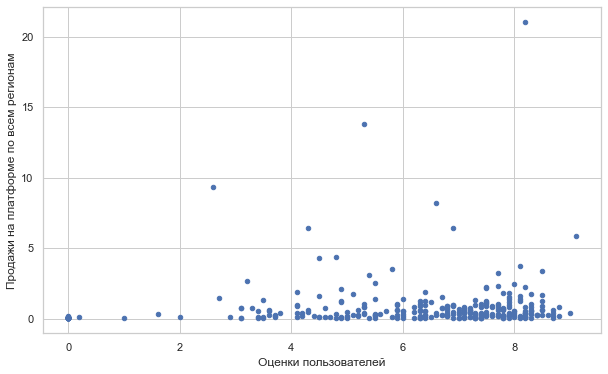

In [31]:
df_ps3_corr.plot(x='user_score', y='all_sales', kind='scatter', grid=True)
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи на платформе по всем регионам")
plt.show()

In [32]:
#Посчитаем коэффициенты корреляции:
df_ps3_corr.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.558611,0.331497
user_score,0.558611,1.000000,0.094424
all_sales,0.331497,0.094424,1.000000


**Выводы:** Из диаграмм рассеяния видно, что чем выше оценки критиков и оценки пользователей, тем больше продаж игр на выбранной платформе. Однако, коэффициенты корреляции говорят о том, что зависимость между этими показателями невысокая и в большей степени на количество продаж на определенной платформе влияют оценки критиков, а не оценки пользователей.

In [33]:
#Ту же зависимость можно увидеть и при расчете коэффициентов корреляции для других платформ:
df_xone1 = df_new.query('platform == "XOne"')
df_xone_corr = df_xone1[['platform', 'critic_score', 'user_score', 'all_sales']]
display('Коэффициенты корреляции для XOne', df_xone_corr.corr())

df_x360 = df_new.query('platform == "X360"')
df_x360_corr = df_x360[['platform', 'critic_score', 'user_score', 'all_sales']]
display('Коэффициенты корреляции для Х360', df_x360_corr.corr())

df_ps4 = df_new.query('platform == "PS4"')
df_ps4_corr = df_ps4[['platform', 'critic_score', 'user_score', 'all_sales']]
display('Коэффициенты корреляции для PS4', df_ps4_corr.corr())


df_3ds = df_new.query('platform == "3DS"')
df_3ds_corr = df_3ds[['platform', 'critic_score', 'user_score', 'all_sales']]
display('Коэффициенты корреляции для 3DS', df_3ds_corr.corr())

'Коэффициенты корреляции для XOne'

,critic_score,user_score,all_sales
critic_score,1.000000,0.465368,0.416998
user_score,0.465368,1.000000,0.074486
all_sales,0.416998,0.074486,1.000000


'Коэффициенты корреляции для Х360'

,critic_score,user_score,all_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.062215
all_sales,0.360573,0.062215,1.000000


'Коэффициенты корреляции для PS4'

,critic_score,user_score,all_sales
critic_score,1.000000,0.520752,0.406568
user_score,0.520752,1.000000,0.023279
all_sales,0.406568,0.023279,1.000000


'Коэффициенты корреляции для 3DS'

,critic_score,user_score,all_sales
critic_score,1.000000,0.657600,0.320803
user_score,0.657600,1.000000,0.268579
all_sales,0.320803,0.268579,1.000000


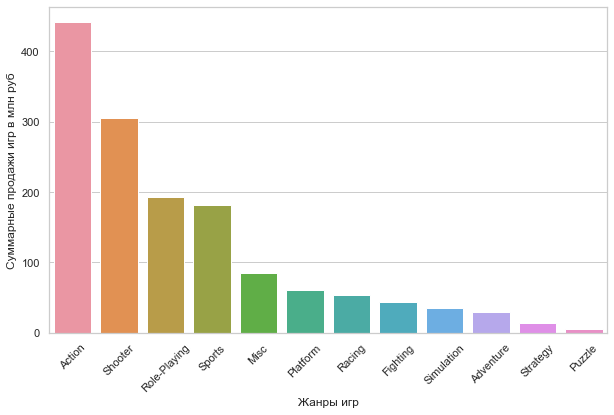

In [34]:
#Построим гистограмму распределения игр по жанрам:
df_genres = df_new.pivot_table(index='genre', values='all_sales', 
                                   aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)
#df_genres
barplot1 = sns.barplot(x='genre', y='all_sales', data=df_genres, ci=None)
plt.xlabel("Жанры игр")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.xticks(rotation=45)
plt.show()

**Вывод:** На диаграмме видно, что в актуальном периоде (2005-2016) наибольшие продажи приносят игры жанра "Action", на втором месте жанр "Sports" и на третьем месте - "Shooter".

## Составление портрета пользователя каждого региона <a name="fourth"></a>

### Определение топ-5 популярных игровых платформ в каждом регионе <a name="fourth_one"></a>

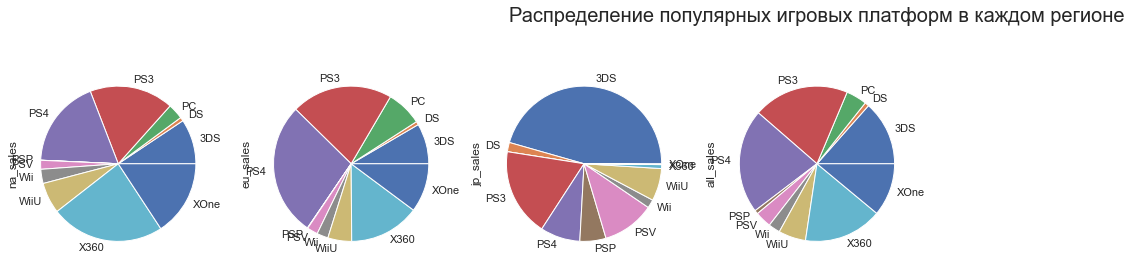

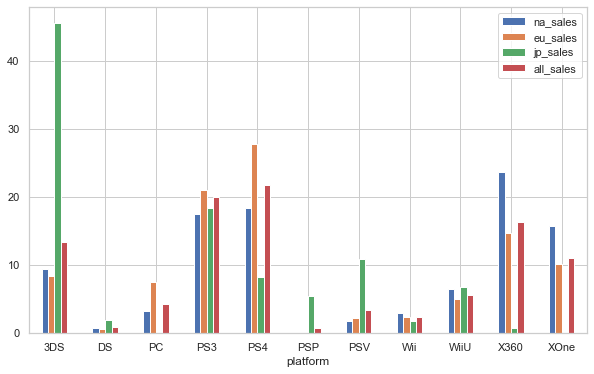

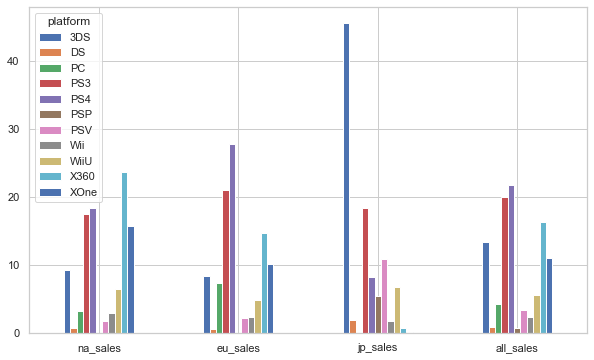

In [35]:
#Построим диаграммы продаж игр в каждом регионе:
region_ratio = df_new.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'all_sales']].sum()
region_ratio = region_ratio / region_ratio.sum() * 100
region_ratio.plot.pie(subplots=True, legend=False, figsize=(16, 6));
plt.title('Распределение популярных игровых платформ в каждом регионе', y = 1.2, fontsize = 20)
plt.show()
region_ratio.plot.bar(figsize=(10, 6), rot=0);
region_ratio.T.plot.bar(figsize=(10, 6), rot=0);
plt.show()

In [36]:
#Определим топ-5 для Японии:
df_jp_user = df_new.pivot_table(index='platform', values=['jp_sales', 'all_sales'], aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head()

#Добавим столбец с долей продаж в регионе от общих продаж:
df_jp_user['ratio_jp'] = ((df_jp_user['jp_sales'] / df_jp_user['all_sales']) * 100).round(1).astype(str) + '%'
df_jp_user

,platform,all_sales,jp_sales,ratio_jp
0,3DS,194.61,87.79,45.1%
3,PS3,288.79,35.29,12.2%
6,PSV,49.18,21.04,42.8%
4,PS4,314.14,15.96,5.1%
8,WiiU,82.19,13.01,15.8%


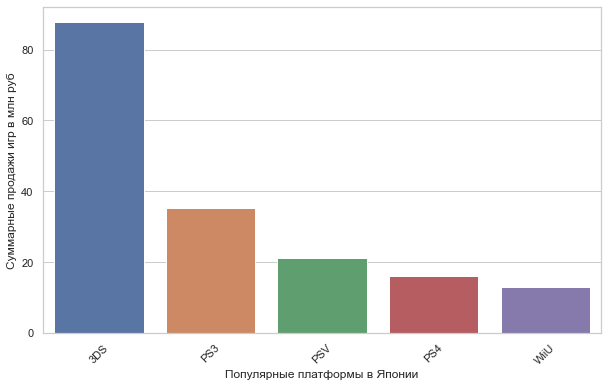

In [37]:
#Построим столбчатую диаграмму распределения продаж на топ-5 платформах в Японии:
sns.barplot(x='platform', y='jp_sales', data=df_jp_user, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Популярные платформы в Японии")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

**Вывод:** В Японии наиболее популярны платформы: 3DS, PS3, PSV, PS4, WiiU.    
Самая популярная платформа в Японии- 3DS, от общих продаж по всем регионам продажи на этой платформе составляют 45,1%.

In [38]:
#Определим топ-5 популярных платформ для Европы:
df_eu_user = df_new.pivot_table(index='platform', values=['eu_sales', 'all_sales'], aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head()
#df_eu_user

#Добавим столбец с долей продаж в регионе от общих продаж:
df_eu_user['ratio_eu'] = ((df_eu_user['eu_sales'] / df_eu_user['all_sales']) * 100).round(1).astype(str) + '%'
df_eu_user

,platform,all_sales,eu_sales,ratio_eu
4,PS4,314.14,141.09,44.9%
3,PS3,288.79,106.86,37.0%
9,X360,236.54,74.52,31.5%
10,XOne,159.32,51.59,32.4%
0,3DS,194.61,42.64,21.9%


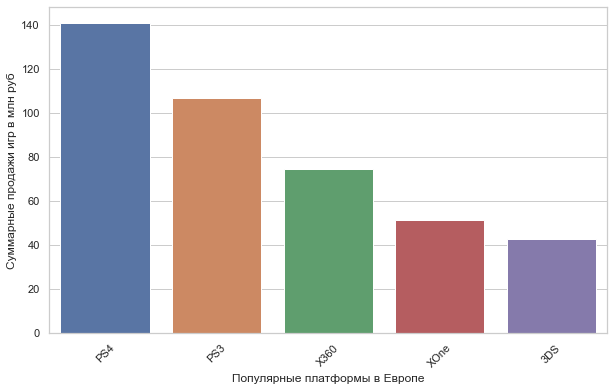

In [39]:
#Построим столбчатую диаграмму распределения продаж на топ-5 платформах в Европе:
sns.barplot(x='platform', y='eu_sales', data=df_eu_user, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Популярные платформы в Европе")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

**Вывод:** В Европе наиболее популярны платформы: PS4, PS3, X360, XOne, 3DS.  
Самая популярная платформа в выбранном периоде - PS4, продажи на ней в этом регионе составляют 44,9% от всех продаж.

In [40]:
#Определим топ-5 популярных платформ для Северной Америки:
df_na_user = df_new.pivot_table(index='platform', values=['na_sales', 'all_sales'], aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head()
#df_eu_user

#Добавим столбец с долей продаж в регионе от общих продаж:
df_na_user['ratio_na'] = ((df_na_user['na_sales'] / df_na_user['all_sales']) * 100).round(1).astype(str) + '%'
df_na_user

,platform,all_sales,na_sales,ratio_na
9,X360,236.54,140.05,59.2%
4,PS4,314.14,108.74,34.6%
3,PS3,288.79,103.38,35.8%
10,XOne,159.32,93.12,58.4%
0,3DS,194.61,55.31,28.4%


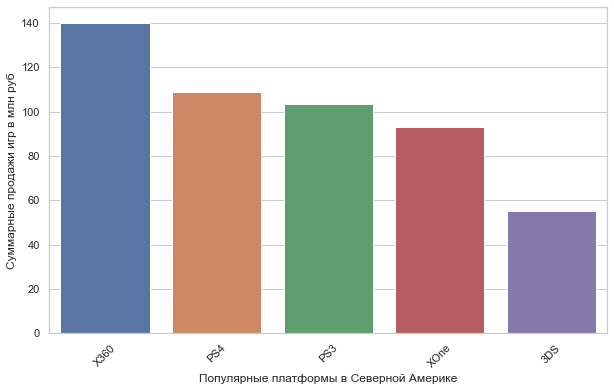

In [41]:
#Построим столбчатую диаграмму распределения продаж на топ-5 платформах в Северной Америке:
sns.barplot(x='platform', y='na_sales', data=df_na_user, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Популярные платформы в Северной Америке")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

**Вывод:** В Северной Америке наиболее популярны платформы: X360, PS4, PS3, XOne, 3DS.  
Продажи на самой популярной платформе в регионе- X360 составляют 59,2% от всех продаж.
На четвертом месте платформа XOne, но продажи от общих на этой платформе составляют 58,4%, то есть больше половины от всех продаж во всех регионах.

### Определение топ-5 популярных игровых жанров в каждом регионе <a name="fourth_two"></a>

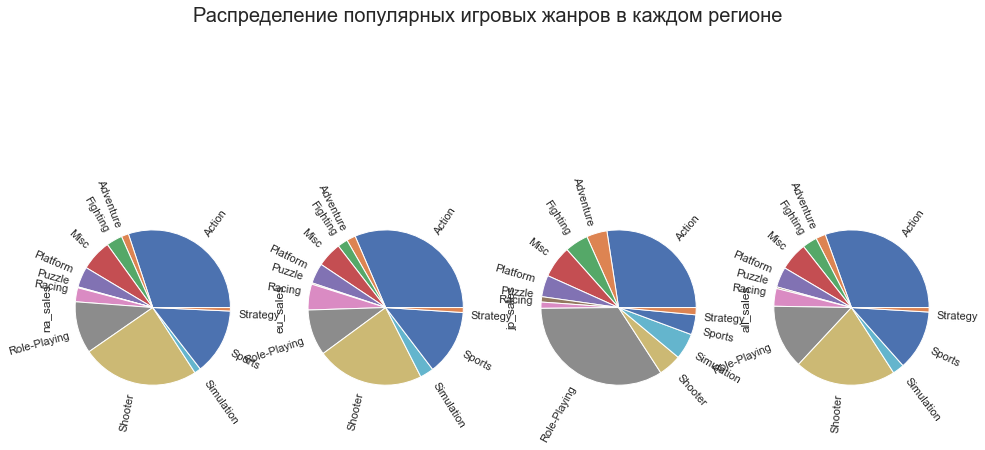

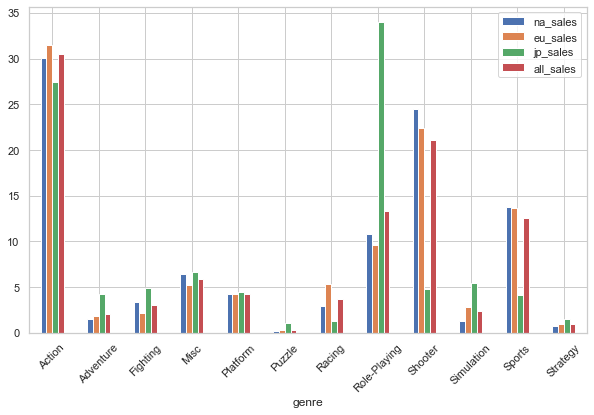

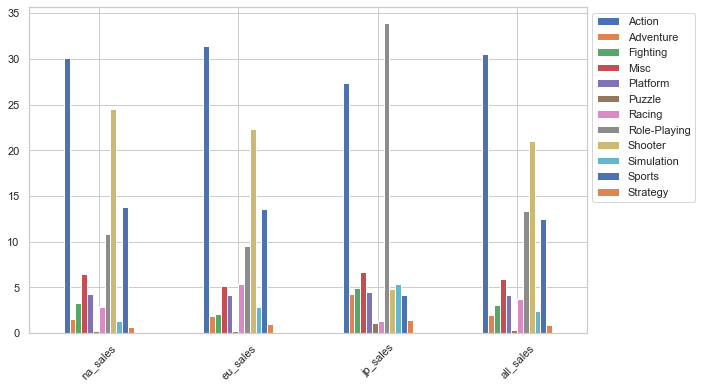

In [42]:
# Для Японии:
genre_ratio = df_new.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'all_sales']].sum()
genre_ratio = genre_ratio / genre_ratio.sum() * 100
genre_ratio.plot.pie(subplots=True, legend=False, figsize=(16, 6), rotatelabels=True)
plt.suptitle('Распределение популярных игровых жанров в каждом регионе', y = 1.2, fontsize = 20)
plt.show();
genre_ratio.plot.bar(figsize=(10, 6), rot=45);
genre_ratio.T.plot.bar(figsize=(10, 6), rot=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

In [43]:
#Определим топ-5 в Японии:
df_jp_genre = df_new.pivot_table(index='genre', values=[
    'jp_sales', 'all_sales'], aggfunc='sum').reset_index().sort_values(
    by='jp_sales', ascending=False).head()
df_jp_genre['ratio_jp_genre'] = ((df_jp_genre['jp_sales'] / df_jp_genre['all_sales']) * 100
                                ).round(1).astype(str) + '%'
df_jp_genre

,genre,all_sales,jp_sales,ratio_jp_genre
7,Role-Playing,192.80,65.44,33.9%
0,Action,441.12,52.80,12.0%
3,Misc,85.04,12.86,15.1%
9,Simulation,35.12,10.41,29.6%
2,Fighting,44.49,9.44,21.2%


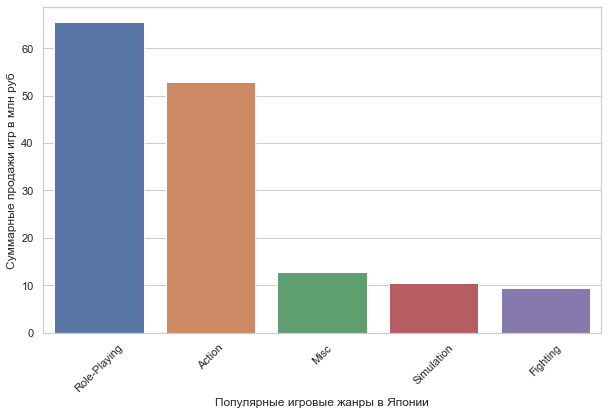

In [44]:
#Построим столбчатую диаграмму для жанров в Японии:
sns.barplot(x='genre', y='jp_sales', data=df_jp_genre, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Популярные игровые жанры в Японии")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

*Вывод:* В Японии наиболее популярны следующие игровые жанры: Role-Playing, Action, Misc, Sumulation, Fighting.  
Продажи жанра Role-Playing составляют 33,9% от продаж по всем регионам.

In [45]:
#Определим топ-5 в Европе:
df_eu_genre = df_new.pivot_table(index='genre', values=[
    'eu_sales', 'all_sales'], aggfunc='sum').reset_index().sort_values(
    by='eu_sales', ascending=False).head()
df_eu_genre['ratio_eu_genre'] = ((df_eu_genre['eu_sales'] / df_eu_genre['all_sales']) * 100
                                ).round(1).astype(str) + '%'
df_eu_genre

,genre,all_sales,eu_sales,ratio_eu_genre
0,Action,441.12,159.34,36.1%
8,Shooter,304.73,113.47,37.2%
10,Sports,181.07,69.09,38.2%
7,Role-Playing,192.80,48.53,25.2%
6,Racing,53.50,27.29,51.0%


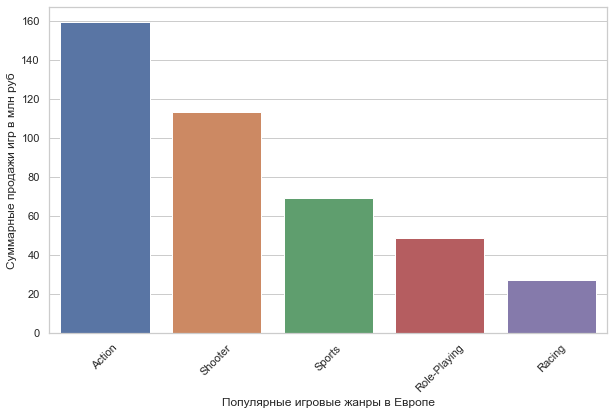

In [46]:
#Построим столбчатую диаграмму для жанров в Европе:
sns.barplot(x='genre', y='eu_sales', data=df_eu_genre, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Популярные игровые жанры в Европе")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

*Вывод:* В Европе наиболее популярен игровой жанр- Action, на втором месте- Shooter.  
Самую большую долю на этом рынке по отношению ко всем рынкам составляют продажи игр жанра Racing (51%), но в самом регионе этот жанр находится на 5м месте.

In [47]:
#Определим топ-5 в Северной Америке:
df_na_genre = df_new.pivot_table(index='genre', values=[
    'na_sales', 'all_sales'], aggfunc='sum').reset_index().sort_values(
    by='na_sales', ascending=False).head()
df_na_genre['ratio_na_genre'] = ((df_na_genre['na_sales'] / df_na_genre['all_sales']) * 100
                                ).round(1).astype(str) + '%'
df_na_genre

,genre,all_sales,na_sales,ratio_na_genre
0,Action,441.12,177.84,40.3%
8,Shooter,304.73,144.77,47.5%
10,Sports,181.07,81.53,45.0%
7,Role-Playing,192.80,64.00,33.2%
3,Misc,85.04,38.19,44.9%


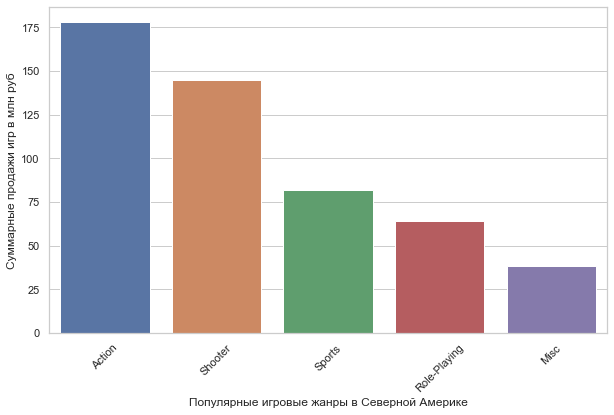

In [48]:
#Построим столбчатую диаграмму для жанров в Северной Америке:
sns.barplot(x='genre', y='na_sales', data=df_na_genre, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Популярные игровые жанры в Северной Америке")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

*Вывод:* В Северной Америке наиболее популярен игровой жанр- Action и продажи этого жанра составляют 40,3% от всех продаж.  
Жанр Shooter находится в этом регионе на 2м месте, однако, его продажи по отношению к общим продажам по всем регионам составляют 47,5% ,что является самым большим показателем для этого жанра по всем регионам.

### Определение влияния рейтинга ESRB на продажи игр в каждом регионе <a name="fourth_three"></a>

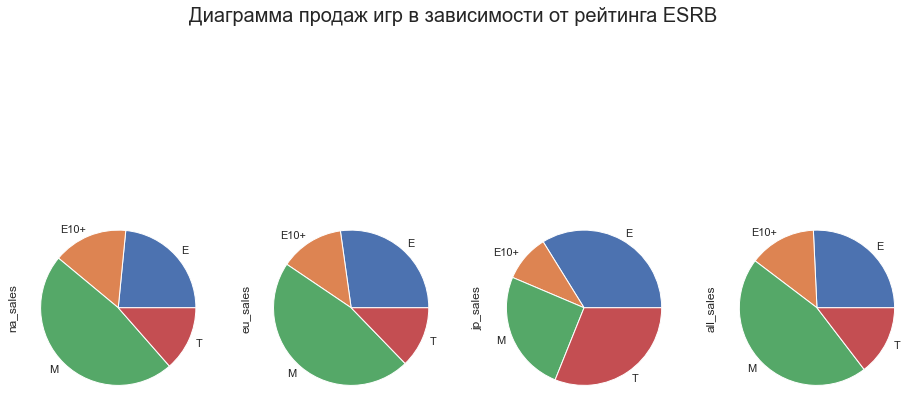

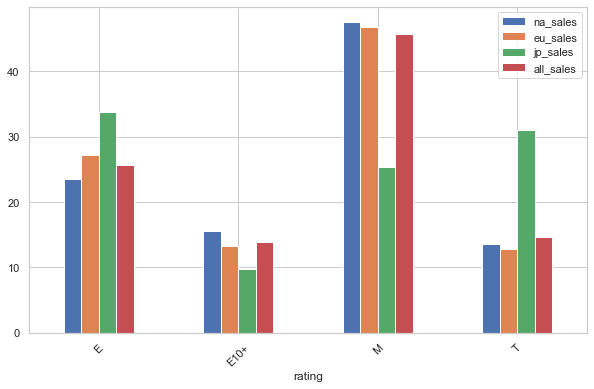

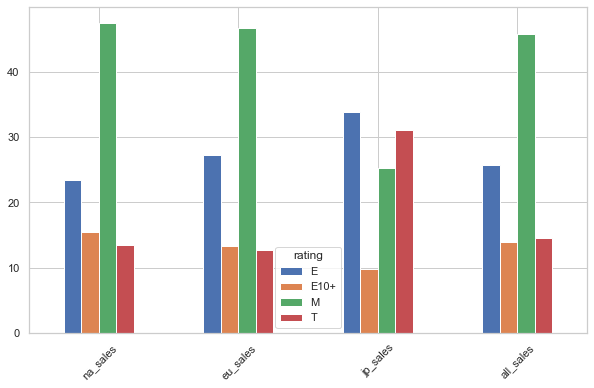

In [49]:
#Построим диаграммы продаж игр в каждом регионе в зависимости от рейтинга ESRB:
esrb_ratio = df_new.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'all_sales']].sum()
esrb_ratio = esrb_ratio / esrb_ratio.sum() * 100
esrb_ratio.plot.pie(subplots=True, legend=False, figsize=(16, 6))
plt.suptitle('Диаграмма продаж игр в зависимости от рейтинга ESRB', y = 1.2, fontsize = 20)
plt.show();
esrb_ratio.plot.bar(figsize=(10, 6), rot=45)
plt.show();
esrb_ratio.T.plot.bar(figsize=(10, 6), rot=45)
plt.show()

In [50]:
#Так как в столбце 'rating' было много пропусков, то для начала сформируем датафрейм для анализа
#и удалим пропущенные строки:
df_esrb = df_new[['name', 'rating', 'jp_sales', 'eu_sales', 'na_sales']]
df_esrb.dropna(subset=['rating'], inplace=True)
df_esrb.head()

C:\Users\antig\AppData\Local\Temp\ipykernel_12020\632907228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esrb.dropna(subset=['rating'], inplace=True)


,name,rating,jp_sales,eu_sales,na_sales
16,Grand Theft Auto V,M,0.98,9.09,7.02
23,Grand Theft Auto V,M,0.06,5.14,9.66
34,Call of Duty: Black Ops II,M,0.65,5.73,4.99
35,Call of Duty: Black Ops II,M,0.07,4.24,8.25
42,Grand Theft Auto V,M,0.38,6.31,3.96


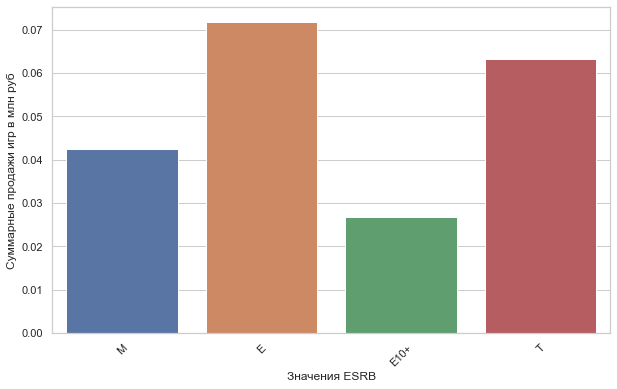

In [51]:
#Рассмотрим влияние рейтинга на продажи игр в Японии:
sns.barplot(x='rating', y='jp_sales', data=df_esrb, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Значения ESRB")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

В Японии наибольшие продажи у игр с рейтингом ESRB Е ("Everyone"), T("Teen"), и M("Mature").

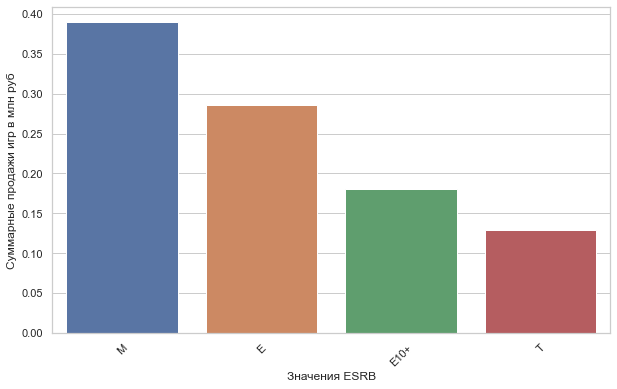

In [52]:
#Рассмотрим влияние рейтинга ESRB на продажи игр в Европе:
sns.barplot(x='rating', y='eu_sales', data=df_esrb, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Значения ESRB")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

В Европе наибольшие продажи имеют игры с рейтингом М("Mature") 

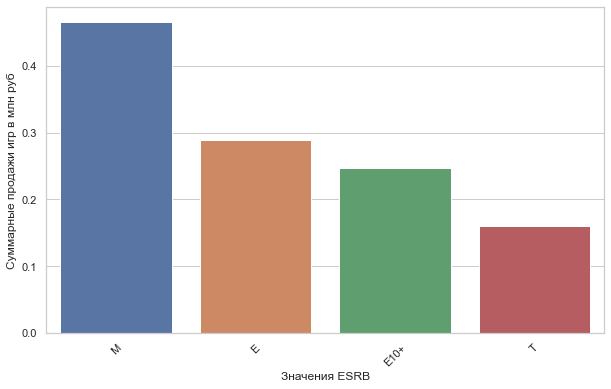

In [53]:
#Рассмотрим влияние рейтинга ESRB на продажи игр в Северной Америке:
sns.barplot(x='rating', y='na_sales', data=df_esrb, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Значения ESRB")
plt.ylabel("Суммарные продажи игр в млн руб")
plt.show()

В Северной Америке, как и в Европе, преобладают продажи игр с рейтингом М("Mature").

**Общие выводы по всем регионам:** 
  
1. Большинство пользователей Японии отдает предпочтение игровому жанру Role-Playing и игровой платформе 3DS,которая была выпущена как раз в Японии и пришла на смену другой самой популярной платформе- DS.   

2. Пользователи Европы во многом схожи по игровым предпочтениям с пользователями Северной Америки. В Европе популярен жанр игр- Action, но популярной платформой выпуска игр является PS4 (PlayStation). По количеству проданных игр- примерно 30-40% самых популярных игровых жанров приходится на этот регион и 51% от всех продаж жанра Racing во всех регионах. 

3. Рынок Северной Америки занимает самую большую долю от общего рынка по суммарным продажам.  
По игровым жанрам предпочтения у пользователей Северной Америки такие же, как и у пользователей Европы, но на этом рынке продажи основных игровых жанров составляют больше 40% от общих продаж по всем регионам. Игровую платформу здесь предпочитают X360(Xbox) и 59.2% продаж игр на этой платформе приходится именно на Северную Америку.  
4. Наиболее высокие продажи имеют игры с рейтингом ESRB M(Mature)- в Европе и Северной Америке этот рейтинг преобладает среди остальных, а в Японии находится на 3м месте. Наибольшее количество продаж игр в Японии показывают игры с рейтингами Е(Everyone) и Т(Teen). 

## Проверка гипотез <a name="fifth"></a>

**1. Проверка гипотезы для рейтингов двух платформ:**   
*Нулевая гипотеза (Н0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Альтернативная гипотеза(Н1):Средние пользовательские рейтинги платформ Xbox One и PC различаются*

In [54]:
#Создадим Series с пользовательскими рейтингами для каждой платформы:
df_xone = df.query('platform == "XOne"')['user_score'].dropna() #удаляем пропущенные значения в рейтинге
df_pc = df.query('platform == "PC"')['user_score'].dropna()
#df_pc

In [55]:
#Определим дисперсии для каждого Series:
var_xone = df_xone.var()
print('Дисперсия значений пользовательского рейтинга для платформы XOne равна', var_xone)
var_pc = df_pc.var()
print('Дисперсия значений пользовательского рейтинга для платформы PC равна', var_pc)

Дисперсия значений пользовательского рейтинга для платформы XOne равна 4.095429620034543
Дисперсия значений пользовательского рейтинга для платформы PC равна 5.565431342699317


In [56]:
#Проверим гипотезу о равенстве средних значения рейтингов:
alpha = 0.05 #статистический уровень значимости

results = st.ttest_ind(df_xone, df_pc, equal_var=True)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.032135166564826415
Отвергаем нулевую гипотезу


**2. Проверка гипотезы о неравенстве средних пользовательских рейтингов:**  
*Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action и Sports разные. Переформулируем гипотезу,чтобы применить двусторонний тест:  
Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза Н1:Средние пользовательские рейтинги жанров Action и Sports не равны*

In [57]:
#Создадим Series с пользовательскими рейтингами для каждого жанра:
df_action = df.query('genre == "Action"')['user_score'].dropna()
df_sports = df.query('genre == "Sports"')['user_score'].dropna()

In [58]:
#Определим дисперсии для каждого Series:
var_action = df_action.var()
print('Дисперсия значений пользовательского рейтинга для жанра Action равна', var_action)
var_sports = df_sports.var()
print('Дисперсия значений пользовательского рейтинга для жанра Sports равна', var_sports)

Дисперсия значений пользовательского рейтинга для жанра Action равна 9.700806037816418
Дисперсия значений пользовательского рейтинга для жанра Sports равна 12.258725022652486


In [59]:
results_2 = st.ttest_ind(df_action, df_sports, equal_var=True)

print('p-значение:', results_2.pvalue) 

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3308884245791913e-15
Отвергаем нулевую гипотезу


**Выводы:**
1. Средние пользовательские рейтинги для платформ Xbox One и PC не равны между собой при уровне значимости alpha = 0.05.
2. Средние пользовательские рейтинги для игровых жанров Action и Sports не равны между собой при уровне значимости alpha = 0.05. 

## Общие выводы <a name="sixth"></a>

1. При планировании рекламной кампании на 2017й год необходимо учесть полученные в ходе анализа данные за период с 2002 по 2016 годы, а также особенности каждого региона планируемых продаж.
2. Рынок Северной Америки занимает лидирующее положение по объему продаж игр популярных жанров на всех платформах- от 40 до 50% в среднем, на втором месте- рынок Европы: занимает примерно 30-40%, и на третьем месте рынок Японии- до 30% от общего объема продаж.
3. Самые популярные игровые платформы (по количеству продаж):  
   -в Японии 3DS (Nintendo)- "карманный" вариант консоли;  
   -в Европе PS24(PlayStation)
   -в Северной Америке X360 (Xbox)  
4. Наибольшие продажи показывают игры с рейтингами ESRB M (Mature) и Е(Everyone), а в Японии- еще и Т. Следовательно, выгоднее выпускать игры с рейтингом M или Е.
5. Самыми популярными игровыми жанрами (по объему продаж) являются Action и Shooter в Северной Америке и Европе. В Японии самый популярный игровой жанр-  Role-Playing, а жанр Action- на втором месте. Значит, большую прибыль принесут игры жанров Action и Shooter.
6. На продажи игр большее влияние оказывает рейтинг критиков- это нужно учитывать при запуске релиза игры, возможно, при планировании рекламной кампании учесть затраты на тестирование игр критиками.